In [1]:
# we import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# we mport the csv files of the datasets we want to use

#A
AUDUSD = pd.read_csv('AUDUSD1440.csv', names=["Date", "Time", "Open", "High", "Low", "Close", "Volume"])
AUDJPY = pd.read_csv('AUDJPY1440.csv', names=["Date", "Time", "Open", "High", "Low", "Close", "Volume"])

#E
EURAUD = pd.read_csv('EURAUD1440.csv', names=["Date", "Time", "Open", "High", "Low", "Close", "Volume"])
EURCAD = pd.read_csv('EURCAD1440.csv', names=["Date", "Time", "Open", "High", "Low", "Close", "Volume"])
EURCHF = pd.read_csv('EURCHF1440.csv', names=["Date", "Time", "Open", "High", "Low", "Close", "Volume"])
EURGBP = pd.read_csv('EURGBP1440.csv', names=["Date", "Time", "Open", "High", "Low", "Close", "Volume"])
EURJPY = pd.read_csv('EURJPY1440.csv', names=["Date", "Time", "Open", "High", "Low", "Close", "Volume"])
EURUSD = pd.read_csv('EURUSD1440.csv', names=["Date", "Time", "Open", "High", "Low", "Close", "Volume"])

#G
GBPAUD = pd.read_csv('GBPUSD1440.csv', names=["Date", "Time", "Open", "High", "Low", "Close", "Volume"])
GBPCAD = pd.read_csv('GBPCAD1440.csv', names=["Date", "Time", "Open", "High", "Low", "Close", "Volume"])
GBPJPY = pd.read_csv('GBPJPY1440.csv', names=["Date", "Time", "Open", "High", "Low", "Close", "Volume"])
GBPUSD = pd.read_csv('GBPUSD1440.csv', names=["Date", "Time", "Open", "High", "Low", "Close", "Volume"])
GER30  = pd.read_csv('GER301440.csv', names=["Date", "Time", "Open", "High", "Low", "Close", "Volume"])

#U
USDCAD = pd.read_csv('USDCAD1440.csv', names=["Date", "Time", "Open", "High", "Low", "Close", "Volume"])
USDCHF = pd.read_csv('USDCHF1440.csv', names=["Date", "Time", "Open", "High", "Low", "Close", "Volume"])
USDJPY = pd.read_csv('USDJPY1440.csv', names=["Date", "Time", "Open", "High", "Low", "Close", "Volume"])
USA30 = pd.read_csv('USA301440.csv', names=["Date", "Time", "Open", "High", "Low", "Close", "Volume"])


To make our codes more compact, we are going to use functions instead. These functions would be called upon for each of the downloaded datasets.

I wrote all these codes as five (5) independent functions and tested them before merging them all as one large function to be called out once.

In [3]:
def seasonal_trends(File):
    """Time to calculate the Seasonality Trends"""
    
    
    """delete the 'Time', 'Open', 'High', 'Low' and 'Volume'
    Columns from the dataset as we don't need them"""
    File.drop(File.loc[:, ["Time", "Open", "High", "Low", "Volume"]], inplace=True, axis=1)


    """Converting the 'Date' column from a string to a datetime"""
    File['Date'] = pd.to_datetime(File['Date'])
    
    """Assigning new columns for our next calculations"""
    File['Week_day'] = File.Date.dt.weekday_name
    File['Week_year'] = File.Date.dt.weekofyear
    File['Returns'] = (File.Close/File.Close.shift(1)) - 1
    File['Direction'] = np.where(File.Returns >0,'Bull', 'Bear')
    File['Year'] = File.Date.dt.year
    
    """Getting a range of years to tackle. We need not more than 13 years for each pair"""
    File = File.loc[File.Year >= 2007, :]
    File = File.loc[File.Year < 2018, :]
        

    present_File = File.loc[File['Week_year']== 41,]
    bulls_File = present_File.loc[present_File['Direction'] == 'Bull',:]
    bears_File = present_File.loc[present_File['Direction'] == 'Bear',:]
    
    op_Monbulls = bulls_File.loc[bulls_File['Week_day'] == 'Monday', :]
    op_Tuebulls = bulls_File.loc[bulls_File['Week_day'] == 'Tuesday', :]
    op_Wedbulls = bulls_File.loc[bulls_File['Week_day'] == 'Wednesday', :]
    op_Thubulls = bulls_File.loc[bulls_File['Week_day'] == 'Thursday', :]
    op_Fribulls = bulls_File.loc[bulls_File['Week_day'] == 'Friday', :]
    
    op_Monbears = bears_File.loc[bears_File['Week_day'] == 'Monday', :]
    op_Tuebears = bears_File.loc[bears_File['Week_day'] == 'Tuesday', :]
    op_Wedbears = bears_File.loc[bears_File['Week_day'] == 'Wednesday', :]
    op_Thubears = bears_File.loc[bears_File['Week_day'] == 'Thursday', :]
    op_Fribears = bears_File.loc[bears_File['Week_day'] == 'Friday', :]
    
    mon_bullConfidence =len(op_Monbulls)/(len(op_Monbulls) + len(op_Monbears))
    mon_bearConfidence = len(op_Monbears)/(len(op_Monbears) + len(op_Monbulls))

    tue_bullConfidence =len(op_Tuebulls)/(len(op_Tuebulls) + len(op_Tuebears))
    tue_bearConfidence = len(op_Tuebears)/(len(op_Tuebears) + len(op_Tuebulls))

    wed_bullConfidence =len(op_Wedbulls)/(len(op_Wedbulls) + len(op_Wedbears))
    wed_bearConfidence = len(op_Wedbears)/(len(op_Wedbears) + len(op_Wedbulls))

    thu_bullConfidence =len(op_Thubulls)/(len(op_Thubulls) + len(op_Thubears))
    thu_bearConfidence = len(op_Thubears)/(len(op_Thubears) + len(op_Thubulls))

    fri_bullConfidence =len(op_Fribulls)/(len(op_Fribulls) + len(op_Fribears))
    fri_bearConfidence = len(op_Fribears)/(len(op_Fribears) + len(op_Fribulls))
    
    output = pd.DataFrame({'Direction':['Bull', 'Bear'], 
                  'Monday':[mon_bullConfidence, mon_bearConfidence], 
                  'Tuesday':[tue_bullConfidence, tue_bearConfidence],
                  'Wednesday':[wed_bullConfidence,wed_bearConfidence],
                  'Thursday':[thu_bullConfidence,thu_bearConfidence],
                   'Friday':[fri_bullConfidence,fri_bearConfidence]},
                   columns=['Direction','Monday','Tuesday', 'Wednesday','Thursday',  'Friday'],
                   ).set_index('Direction')
  
    return output[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']].plot.bar()

#.where(output > 0.65)


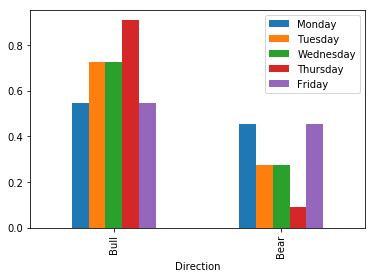

In [4]:
seasonal_trends(AUDUSD)

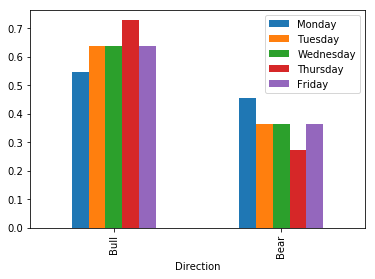

In [5]:
seasonal_trends(AUDJPY)

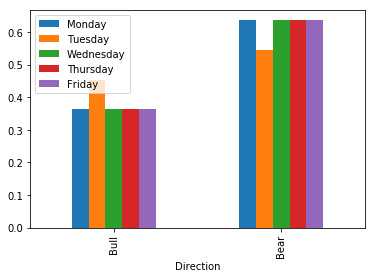

In [6]:
seasonal_trends(EURAUD)

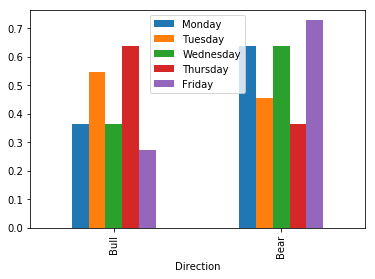

In [7]:
seasonal_trends(EURCAD)

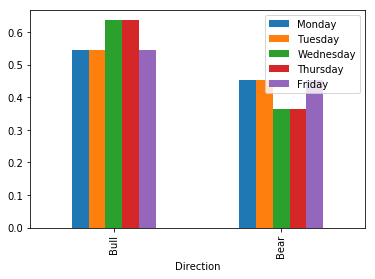

In [8]:
seasonal_trends(EURCHF)

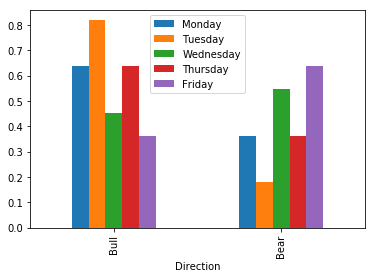

In [9]:
seasonal_trends(EURGBP)

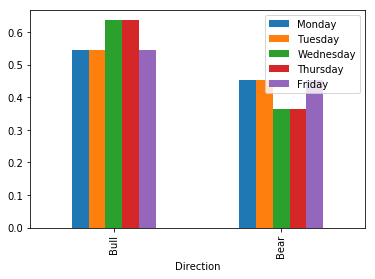

In [10]:
seasonal_trends(EURJPY)

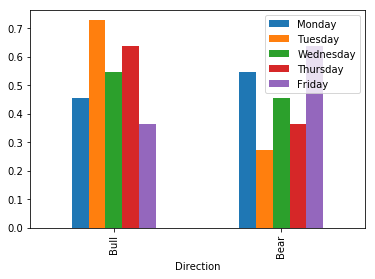

In [11]:
seasonal_trends(EURUSD)

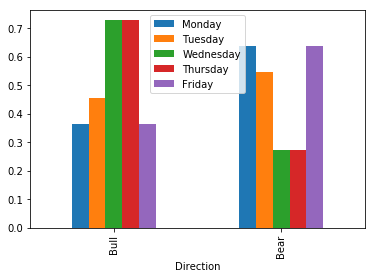

In [12]:
seasonal_trends(GBPAUD)

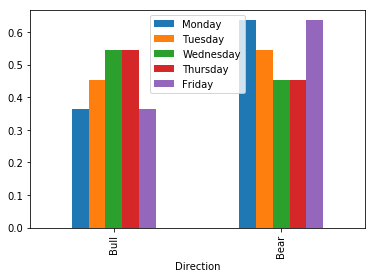

In [13]:
seasonal_trends(GBPCAD)


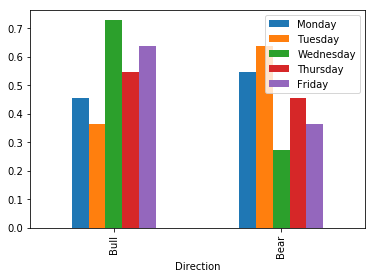

In [14]:
seasonal_trends(GBPJPY)


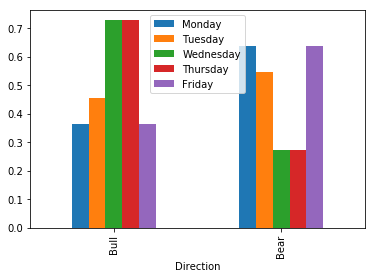

In [15]:
seasonal_trends(GBPUSD)

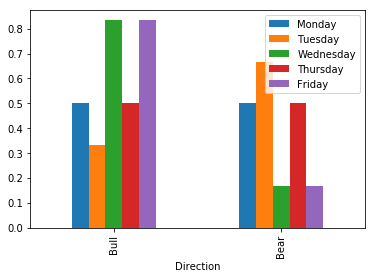

In [16]:
seasonal_trends(GER30)

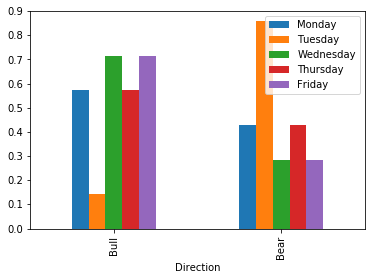

In [17]:
seasonal_trends(USA30)

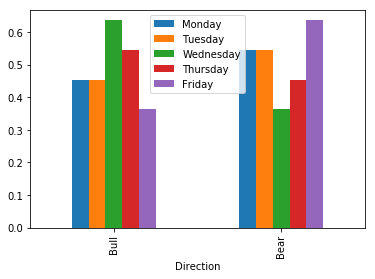

In [18]:
seasonal_trends(USDCAD)

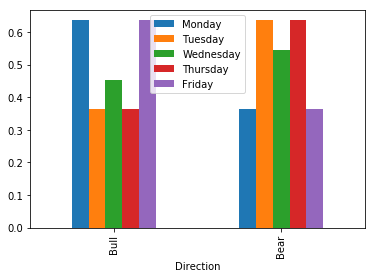

In [19]:
seasonal_trends(USDCHF)

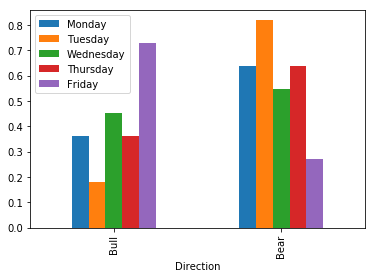

In [20]:
seasonal_trends(USDJPY)